In [10]:
import numpy as np 
import random
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

def get_angle_based_on_val(desired_value):
    # Find angles theta such that cos(theta) = desired_value
    theta_cos = np.arccos(desired_value)
    theta_deg_cos = np.degrees(theta_cos)
    
    # Find angles theta such that sin(theta) = desired_value
    theta_sin = np.arcsin(desired_value)
    theta_deg_sin = np.degrees(theta_sin)
    
    print(f"Angle (cosine) theta = {theta_deg_cos} degrees or {theta_cos} radians")
    print(f"Angle (sine) theta = {theta_deg_sin} degrees or {theta_sin} radians")
    return theta_deg_cos,theta_deg_sin
    
@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()
    
##################
ket_0 = np.array([1, 0])
target_element_magnitude = 1/np.sqrt(2) # Coming from Hadamard
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2) # H Matrix
result_state = np.dot(U,ket_0)
print("result_state:",result_state)
sin_theta_2 = target_element_magnitude
theta = 2 * np.arcsin(sin_theta_2)
print("theta:",theta)
print("get_angle_based_on_val",get_angle_based_on_val(sin_theta_2))
cos_theta_2 = np.cos(theta / 2)
print("cos_theta_2:",cos_theta_2)

sin_theta_2 = np.sin(theta / 2)
print("sin_theta_2:",sin_theta_2)

# Constructing the RX gate matrix - just for fun sake :)
RX = np.array([
    [cos_theta_2, -1j * sin_theta_2],
    [-1j * sin_theta_2, cos_theta_2]
])
print("RX:",RX)
# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
cos_theta_2 = np.pi / 2
print("cos_theta_2:",cos_theta_2)
phi, theta, omega = cos_theta_2, cos_theta_2, cos_theta_2

state_to_match = np.array(hadamard_with_rz_rx())
print("state_to_match:",state_to_match)
inner_product = np.vdot(state_to_match, result_state)  # inner product <state1|state2>
print("inner_product:",inner_product)
# Check if the states are identical
identical = np.isclose(np.abs(inner_product), 1.0)
print(f"The states are identical: {identical}")
##################

result_state: [0.70710678 0.70710678]
theta: 1.5707963267948963
Angle (cosine) theta = 45.00000000000001 degrees or 0.7853981633974484 radians
Angle (sine) theta = 44.99999999999999 degrees or 0.7853981633974482 radians
get_angle_based_on_val (45.00000000000001, 44.99999999999999)
cos_theta_2: 0.7071067811865477
sin_theta_2: 0.7071067811865475
RX: [[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]
cos_theta_2: 1.5707963267948966
state_to_match: [0.-0.70710678j 0.-0.70710678j]
inner_product: 1.0000000000000002j
The states are identical: True


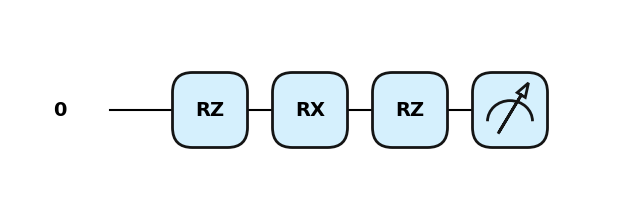

In [9]:
circuit = qml.QNode(hadamard_with_rz_rx, dev)
qml.drawer.use_style("pennylane")
result = qml.draw_mpl(circuit)()
plt.show()